# Confusion matrices and metrics

To assess the ability of the algorithm of producing the correct output is necessary to evaluate a performance measure (P), which is a quantitative measure specific to the task. Ideally, the Machine Learning algorithm should be deployed in the real world, consequently we want to evaluate how well it performs on unseen data. Thus the performance measures will be calculated using a test set of data, separated from the data used for training. 
After testing the network with the script ***prediction.py***, we have to define the performance measure to evaluate the results.
For the deep CNN ResNet classifier we chose three different performance measures: *accuracy, recall and precision*. All of them are calculated onwards a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix):

 - **Accuracy**: the ratio of correctly predicted observations to the total observations.
 <table><tr>
 <td> <img src=Schermata%20del%202021-05-17%2010-35-59.png alt="Drawing" style="width:590px;height:90px"/> </td>
 <td> <img src=Schermata%20del%202021-05-17%2012-27-37.png alt="Drawing" style="width:280px;height:330px"/> </td>
 </tr></table>

 - **Recall**: the ratio of correctly predicted positive observations to the all observations in actual class. Because our network is a multiclass classifier, this metrics is calculated for each label and the final result is the mean over the 4 labels.
 
 <table><tr>
<td> <img src=Schermata%20del%202021-05-17%2010-37-11.png alt="Drawing" style="width:320px;height:60px"/> </td>
<td> <img src=Schermata%20del%202021-05-17%2012-39-14.png alt="Drawing" style="width:190px;height:190px"/> </td>
 </tr></table>
 
 
 - **Precision**: the ratio of correctly predicted positive observations to the total predicted positive observations. Even in this case the metrics is calculated for each label and the final result is the mean over the 4 labels.
 
 <table><tr>
 <td> <img src=Schermata%20del%202021-05-17%2010-37-52.png style="width:320px;height:60px"/> </td>
 <td> <img src=Schermata%20del%202021-05-17%2012-49-53.png style="width:190px;height:190px"/> </td>
 </tr></table>

This script can be used to obtain the confusion matrix and metrics (accuracy, recall and precision) on each tested CNN trained on a single projection (Cranio-Caudal Right [CC_R], Cranio-Caudal Left [CC_L], Medio-Lateral-Oblique Right [MLO_R] and Medio-Lateral-Oblique Left [MLO_L]). It also computes the confusion matrix and metrics on each side (Right and Left) and the total confusion  matrix and the total metrics calculated over all four projections. 
This is the final result used as performance measure to evaluate the deep neural network.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import recall_score, accuracy_score, precision_score, classification_report

## How to build the confusion matrix

This function prints and plots the confusion matrix. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

Normalization can be applied by setting `normalize=True`to obtain the confusion matrix with normalization by class support size (number of elements in each class). This kind of normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified.


In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #if not title:
    #    if normalize:
    #        title = 'Normalized confusion matrix'
    #    else:
    #        title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

## Import testing results and define labels (projections of the right breast)

`pd.read_csv` reads a comma-separated values (csv) file into a pandas DataFrame (tabular data).

Select as filepath the path to the output file of the script ***prediction.py***, which tested the model on a test set of images and returned a .txt file with 4 (number of classes) columns and the number of rows equal to the number of images in the test set. In each row there is the probability assigned by the model to each of the 4 classes for that image.

>In `df_MLOR` choose the output file of the model trained and tested on the MLO_R projection images.

>In `df_CCR` choose the output file of the model trained and tested on the CC_R projection images.

In the current folder we uploaded files ***predictions_mlor.txt*** and ***predictions_ccr.txt*** obtained from a pre-trained and tested ResNet model to use them as examples. If you have trained and tested your own network replace them with your output file of testing results.

We rename the column indeces of the pandas DataFrame with the name of the class labels. The *"0"* index corresponds to class *"A"*, the *"1"* index correspond to class *"B"*, the *"2"* index corresponds to class *"C"* and the *"3"* index corresponds to class *"D"*.

In [3]:
df_MLOR = pd.read_csv('predictions_mlor.txt', sep=" ", header=None)   
df_CCR = pd.read_csv('predictions_ccr.txt', sep=" ", header=None)
df_MLOR.columns = ["a", "b", "c", "d"]
df_CCR.columns = ["a", "b", "c", "d"]

We define the list of true label. Our test images are in order of class and in our specific test set we have selected *"14"* images of class *"A"*, *"51"* images of class *"B"*, *"50"* images of class *"C"* and *"13"* images of class *"D"*. And we add the column with the list of true labels to `df_MLOR` and `df_CCR` pandas DataFrames.

In [4]:
label = 14*[0] + 51*[1] + 50*[2] + 13*[3]

In [5]:
df_MLOR['label'] = label        
df_CCR['label'] = label

In [6]:
df_CCR.head()

,a,b,c,d,label
0,0.383799,0.603904,0.012240,0.000056,0
1,0.757996,0.240576,0.001372,0.000056,0
2,0.725141,0.267239,0.006903,0.000718,0
3,0.935155,0.064467,0.000370,0.000009,0
4,0.031426,0.940031,0.028493,0.000051,0


In [7]:
df_MLOR.head()

,a,b,c,d,label
0,0.318187,0.674340,0.007449,0.000024,0
1,0.673485,0.312149,0.012549,0.001817,0
2,0.951315,0.047724,0.000752,0.000208,0
3,0.777162,0.221808,0.001025,0.000004,0
4,0.034505,0.808531,0.139677,0.017288,0


We define the list of predicted labels. We built it by scrolling the column indices (.iloc) for each row in the pandas DataFrame and selecting as predicted label the class correspondent to the maximum probability value. And we add the column with the list of predicted labels to `df_MLOR` and `df_CCR` pandas DataFrames.

In [8]:
prediction_MLOR = np.argmax((df_MLOR.iloc[:,0:4]).to_numpy(), axis=1)
prediction_CCR = np.argmax((df_CCR.iloc[:,0:4]).to_numpy(), axis=1)

In [9]:
df_MLOR['predict'] = prediction_MLOR
df_CCR['predict'] = prediction_CCR

In [10]:
df_CCR.head()

,a,b,c,d,label,predict
0,0.383799,0.603904,0.012240,0.000056,0,1
1,0.757996,0.240576,0.001372,0.000056,0,0
2,0.725141,0.267239,0.006903,0.000718,0,0
3,0.935155,0.064467,0.000370,0.000009,0,0
4,0.031426,0.940031,0.028493,0.000051,0,1


In [11]:
df_MLOR.head()

,a,b,c,d,label,predict
0,0.318187,0.674340,0.007449,0.000024,0,1
1,0.673485,0.312149,0.012549,0.001817,0,0
2,0.951315,0.047724,0.000752,0.000208,0,0
3,0.777162,0.221808,0.001025,0.000004,0,0
4,0.034505,0.808531,0.139677,0.017288,0,1


## Metrics for the CC_R projection

1. We plot the confusion matrix for the CC_R projection, by using the CC_R pandas DataFrame previously built.
We set xticklabels and yticklabels in the plot of the confusion matrix as the name of the 4 classes.

2. We compute the figures of merit from the confusion matrix by using the sklearn.metrics [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and we store them in a pandas DataFrame.

In [12]:
class_names = np.array(['A','B','C','D'], dtype='<U10')

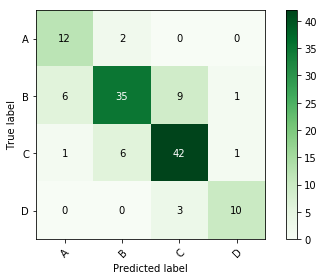

In [13]:
plot_confusion_matrix(df_CCR['label'], df_CCR['predict'], classes=class_names)
plt.savefig('provaconfusion_CCR.png', dpi=300)

In [14]:
metrics_CCR = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(df_CCR['label'], df_CCR['predict'])],
    'recall':[recall_score(df_CCR['label'], df_CCR['predict'], average='macro')],
    'precision':[precision_score(df_CCR['label'], df_CCR['predict'], average='macro')]
    },
orient = 'index')

In [15]:
metrics_CCR

,0
accuracy,0.773438
recall,0.788162
precision,0.764161


## Metrics for the MLO_R projection

We plot the confusion matrix for the MLO_R projection in the same way as for the CC_R projection, by using the MLO_R pandas DataFrame previously built.

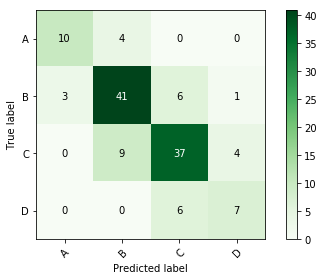

In [16]:
plot_confusion_matrix(df_MLOR['label'], df_MLOR['predict'], classes=class_names)
plt.savefig('provaconfusion_MLOR.png', dpi=300)

In [17]:
metrics_MLOR = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(df_MLOR['label'], df_MLOR['predict'])],
    'recall':[recall_score(df_MLOR['label'], df_MLOR['predict'], average='macro')],
    'precision':[precision_score(df_MLOR['label'], df_MLOR['predict'], average='macro')]
    },
orient = 'index')

In [18]:
metrics_MLOR

,0
accuracy,0.742188
recall,0.699167
precision,0.716731


## Metrics for the right breasts

Now we compute the metrics on the prediction performance for the right breast. We obtain a new pandas Dataframe with the average between the values in the DataFrames of the two right projections (df_CCR, df_MLOR). And then we derive the predicted labels, the confusion matrix and the relative figures of merit on the basis of this new table with average values, exactly the same way we did for the single projections.

In [21]:
pred_right = (df_MLOR.iloc[:,0:4] + df_CCR.iloc[:,0:4])/2

In [22]:
pred_right.head()

,a,b,c,d
0,0.350993,0.639122,0.009845,0.000040
1,0.715741,0.276363,0.006960,0.000936
2,0.838228,0.157481,0.003828,0.000463
3,0.856159,0.143137,0.000698,0.000007
4,0.032965,0.874281,0.084085,0.008669


In [23]:
pred_right['label'] = label

In [24]:
prediction_R = np.argmax((pred_right.iloc[:,0:4]).to_numpy(), axis=1)

In [25]:
pred_right['predict'] = prediction_R
pred_right.head(n=21)

,a,b,c,d,label,predict
0,0.350993,0.639122,0.009845,0.000040,0,1
1,0.715741,0.276363,0.006960,0.000936,0,0
2,0.838228,0.157481,0.003828,0.000463,0,0
3,0.856159,0.143137,0.000698,0.000007,0,0
4,0.032965,0.874281,0.084085,0.008669,0,1
5,0.546735,0.444429,0.008726,0.000110,0,0
6,0.600579,0.379326,0.014020,0.006075,0,0
7,0.808139,0.176785,0.011132,0.003944,0,0
8,0.929201,0.068083,0.001325,0.001391,0,0
9,0.843622,0.155188,0.001084,0.000106,0,0


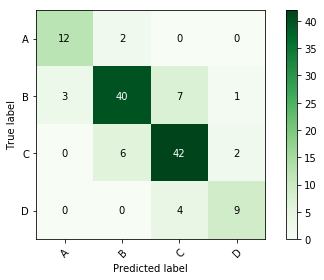

In [26]:
plot_confusion_matrix(pred_right['label'], pred_right['predict'], classes=class_names)
plt.savefig('provaconfusion_right.png', dpi=300)

In [27]:
metrics_right = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(pred_right['label'], pred_right['predict'])],
    'recall':[recall_score(pred_right['label'], pred_right['predict'], average='macro')],
    'precision':[precision_score(pred_right['label'], pred_right['predict'], average='macro')]
    },
orient = 'index')

In [28]:
metrics_right

,0
accuracy,0.804688
recall,0.793441
precision,0.793947


## Import testing results and define labels (projections of the left breast)

We repeat the procedure to import data and create pandas DataFrame used for the projections of the right breast also for the projections of the left breasts.

>In `df_MLOL` choose the output file of the model trained and tested on the MLO_L projection images.

>In `df_CCL` choose the output file of the model trained and tested on the CC_L projection images.

In the current folder we uploaded files ***predictions_mlol.txt*** and ***predictions_ccl.txt*** obtained from a pre-trained and tested ResNet model to use them as examples. If you have trained and tested your own network replace them with your output file of testing results.

In [29]:
df_MLOL = pd.read_csv('predictions_mlol.txt', sep=" ", header=None)   
df_CCL = pd.read_csv('predictions_ccl.txt', sep=" ", header=None)
df_MLOL.columns = ["a", "b", "c", "d"]
df_CCL.columns = ["a", "b", "c", "d"]

In [30]:
df_MLOL['label'] = label
df_CCL['label'] = label

In [31]:
df_MLOL.head()

,a,b,c,d,label
0,0.626203,0.356720,0.016132,0.000945,0
1,0.727158,0.228435,0.027569,0.016838,0
2,0.171668,0.801795,0.025417,0.001120,0
3,0.857950,0.137106,0.004309,0.000635,0
4,0.724302,0.265760,0.007596,0.002342,0


In [32]:
df_CCL.head()

,a,b,c,d,label
0,0.003451,0.927167,0.068421,0.000961,0
1,0.924864,0.074537,0.000573,0.000026,0
2,0.135553,0.779707,0.079313,0.005427,0
3,0.453190,0.524540,0.020415,0.001855,0
4,0.013868,0.915760,0.070050,0.000323,0


In [33]:
prediction_MLOL = np.argmax((df_MLOL.iloc[:,0:4]).to_numpy(), axis=1)
prediction_CCL = np.argmax((df_CCL.iloc[:,0:4]).to_numpy(), axis=1)

In [34]:
df_MLOL['predict'] = prediction_MLOL
df_CCL['predict'] = prediction_CCL

In [35]:
df_MLOL.head()

,a,b,c,d,label,predict
0,0.626203,0.356720,0.016132,0.000945,0,0
1,0.727158,0.228435,0.027569,0.016838,0,0
2,0.171668,0.801795,0.025417,0.001120,0,1
3,0.857950,0.137106,0.004309,0.000635,0,0
4,0.724302,0.265760,0.007596,0.002342,0,0


In [36]:
df_CCL.head()

,a,b,c,d,label,predict
0,0.003451,0.927167,0.068421,0.000961,0,1
1,0.924864,0.074537,0.000573,0.000026,0,0
2,0.135553,0.779707,0.079313,0.005427,0,1
3,0.453190,0.524540,0.020415,0.001855,0,1
4,0.013868,0.915760,0.070050,0.000323,0,1


## Metrics for the MLO_L projection

We plot the confusion matrix for the MLO_L projection in the same way as for the CC_R projection, by using the MLO_L pandas DataFrame previously built.

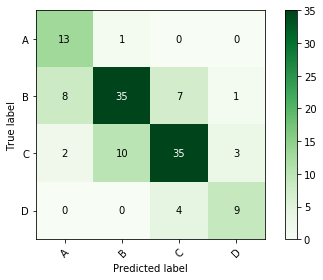

In [37]:
plot_confusion_matrix(df_MLOL['label'], df_MLOL['predict'], classes=class_names)
plt.savefig('provaconfusion_MLOL.png', dpi=300)

In [38]:
metrics_MLOL = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(df_MLOL['label'], df_MLOL['predict'])],
    'recall':[recall_score(df_MLOL['label'], df_MLOL['predict'], average='macro')],
    'precision':[precision_score(df_MLOL['label'], df_MLOL['predict'], average='macro')]
    },
orient = 'index')

In [39]:
metrics_MLOL

,0
accuracy,0.718750
recall,0.751788
precision,0.694816


## Metrics for the CC_L projection

We plot the confusion matrix for the CC_L projection in the same way as for the CC_R projection, by using the CC_L pandas DataFrame previously built.

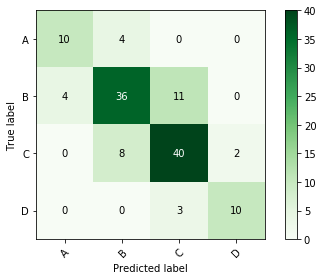

In [40]:
plot_confusion_matrix(df_CCL['label'], df_CCL['predict'], classes=class_names)
plt.savefig('provaconfusion_CCL.png', dpi=300)

In [41]:
metrics_CCL = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(df_CCL['label'], df_CCL['predict'])],
    'recall':[recall_score(df_CCL['label'], df_CCL['predict'], average='macro')],
    'precision':[precision_score(df_CCL['label'], df_CCL['predict'], average='macro')]
    },
orient = 'index')

In [42]:
metrics_CCL

,0
accuracy,0.75000
recall,0.74735
precision,0.75959


## Metrics for the left breasts

Now we compute the metrics on the prediction performance for the left breast. We obtain a new pandas Dataframe with the average between the values in the DataFrames of the two left projections (df_CCL, df_MLOL). And then we derive the predicted labels, the confusion matrix and the relative figures of merit on the basis of this new table with average values, exactly the same way we did for the single projections.

In [43]:
pred_left = (df_MLOL.iloc[:,0:4] + df_CCL.iloc[:,0:4])/2

In [44]:
pred_left.head()

,a,b,c,d
0,0.314827,0.641944,0.042276,0.000953
1,0.826011,0.151486,0.014071,0.008432
2,0.153611,0.790751,0.052365,0.003273
3,0.655570,0.330823,0.012362,0.001245
4,0.369085,0.590760,0.038823,0.001332


In [45]:
pred_left['label'] = label

In [46]:
prediction_L = np.argmax((pred_left.iloc[:,0:4]).to_numpy(), axis=1)

In [47]:
pred_left['predict'] = prediction_L
pred_left.head()

,a,b,c,d,label,predict
0,0.314827,0.641944,0.042276,0.000953,0,1
1,0.826011,0.151486,0.014071,0.008432,0,0
2,0.153611,0.790751,0.052365,0.003273,0,1
3,0.655570,0.330823,0.012362,0.001245,0,0
4,0.369085,0.590760,0.038823,0.001332,0,1


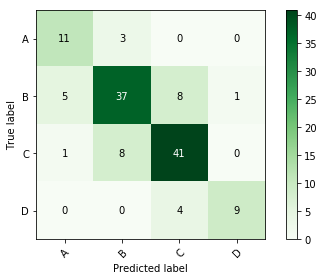

In [48]:
plot_confusion_matrix(pred_left['label'], pred_left['predict'], classes=class_names)
plt.savefig('provaconfusion_left.png', dpi=300)

In [49]:
metrics_left = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(pred_left['label'], pred_left['predict'])],
    'recall':[recall_score(pred_left['label'], pred_left['predict'], average='macro')],
    'precision':[precision_score(pred_left['label'], pred_left['predict'], average='macro')]
    },
orient = 'index')

In [50]:
metrics_left

,0
accuracy,0.765625
recall,0.755878
precision,0.772869


In [61]:
pred_total = (df_MLOL.iloc[:,0:4] + df_CCL.iloc[:,0:4] + df_MLOR.iloc[:,0:4] + df_CCR.iloc[:,0:4])/4

In [62]:
pred_total

,a,b,c,d
0,0.332910,0.640533,0.026060,0.000496
1,0.770876,0.213924,0.010516,0.004684
2,0.495919,0.474116,0.028096,0.001868
3,0.755864,0.236980,0.006530,0.000626
4,0.201025,0.732520,0.061454,0.005001
5,0.706642,0.286507,0.006681,0.000170
6,0.663566,0.281055,0.027330,0.028049
7,0.850417,0.136774,0.008103,0.004706
8,0.937359,0.059175,0.001337,0.002129
9,0.852004,0.145771,0.002019,0.000205


In [63]:
pred_total['label'] = label

In [64]:
prediction_TOT = np.argmax((pred_total.iloc[:,0:4]).to_numpy(), axis=1)

In [65]:
pred_total['predict'] = prediction_TOT
pred_total.head()

,a,b,c,d,label,predict
0,0.332910,0.640533,0.026060,0.000496,0,1
1,0.770876,0.213924,0.010516,0.004684,0,0
2,0.495919,0.474116,0.028096,0.001868,0,0
3,0.755864,0.236980,0.006530,0.000626,0,0
4,0.201025,0.732520,0.061454,0.005001,0,1


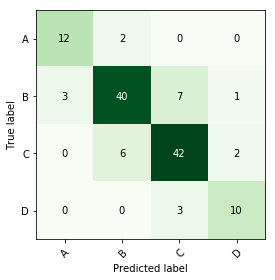

In [66]:
plot_confusion_matrix(pred_total['label'], pred_total['predict'], classes=class_names)
plt.savefig('provaconfusion_total.png', dpi=300)

In [67]:
metrics_total = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(pred_total['label'], pred_total['predict'])],
    'recall':[recall_score(pred_total['label'], pred_total['predict'], average='macro')],
    'precision':[precision_score(pred_total['label'], pred_total['predict'], average='macro')]
    },
orient = 'index')

In [68]:
metrics_total

,0
accuracy,0.812500
recall,0.812672
precision,0.802564
